## **Name:** Affan Zulfiqar

---

## **Reg No:** B22F0144AI050
---
## **Course:** ANN (8)
---
## **Section:** AI22F-Blue


In [2]:
# Import Required Libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

**Load CIFAR-10 dataset**

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print(f"Training Data Shape: {x_train.shape}, Testing Data Shape: {x_test.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Training Data Shape: (50000, 32, 32, 3), Testing Data Shape: (10000, 32, 32, 3)


### **CNN model with Different Filters, Learning Rates, and Kernel Sizes**

In [4]:
def cnn(filters=32, kernel_size=(3,3), learning_rate=0.001):
    model = Sequential([
        Conv2D(filters, kernel_size, activation='relu', input_shape=(32,32,3)),
        MaxPooling2D(pool_size=(2,2)),

        Conv2D(filters*2, kernel_size, activation='relu'),
        MaxPooling2D(pool_size=(2,2)),

        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')  # 10 output classes
    ])

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# Models with different hyperparameters
model_1 = cnn(filters=32, kernel_size=(3,3), learning_rate=0.001)
model_2 = cnn(filters=64, kernel_size=(5,5), learning_rate=0.0005)
model_3 = cnn(filters=128, kernel_size=(7,7), learning_rate=0.0001)

model_1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

### **Experiment with Complex Architectures**

In [5]:
def deep_cnn():
    model = Sequential([
        Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3)),
        MaxPooling2D(pool_size=(2,2)),

        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D(pool_size=(2,2)),

        Conv2D(256, (3,3), activation='relu'),
        MaxPooling2D(pool_size=(2,2)),

        Flatten(),
        Dense(256, activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

deep_model = deep_cnn()
deep_model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 30, 30, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 13, 13, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 635,786 (2.43 MB)

 Trainable params: 635,786 (2.43 MB)

 Non-trainable params: 0 (0.00 B)

### **Modify CNN with Batch Normalization & Dropout**

In [6]:
def advanced_cnn():
    model = Sequential([
        Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3)),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.25),

        Conv2D(128, (3,3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.25),

        Conv2D(256, (3,3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.25),

        Flatten(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

advanced_model = advanced_cnn()
advanced_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 30, 30, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 30, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 13, 13, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 13, 13, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 4, 4, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 904,586 (3.45 MB)

 Trainable params: 902,666 (3.44 MB)

 Non-trainable params: 1,920 (7.50 KB)

### **Training Model**

In [7]:
history = advanced_model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), batch_size=64)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 292s 368ms/step - accuracy: 0.3532 - loss: 2.1196 - val_accuracy: 0.5011 - val_loss: 1.4138
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 316s 360ms/step - accuracy: 0.5683 - loss: 1.2183 - val_accuracy: 0.5014 - val_loss: 1.4758
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 291s 372ms/step - accuracy: 0.6338 - loss: 1.0325 - val_accuracy: 0.6217 - val_loss: 1.1014
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 319s 369ms/step - accuracy: 0.6801 - loss: 0.9149 - val_accuracy: 0.6449 - val_loss: 1.0471
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 286s 366ms/step - accuracy: 0.7058 - loss: 0.8366 - val_accuracy: 0.6802 - val_loss: 0.9162
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 281s 360ms/step - accuracy: 0.7281 - loss: 0.7758 - val_accuracy: 0.6341 - val_loss: 1.1098
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 320s 358ms/step - accuracy: 0.7440 - loss: 0.7354 - val_accuracy: 0.7074 - val_loss: 0.8319
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 321s 357ms/step - accuracy: 0.7584 -

### **Evaluate Model Performance**

313/313 - 10s - 32ms/step - accuracy: 0.8051 - loss: 0.5816

Test Accuracy: 0.8051


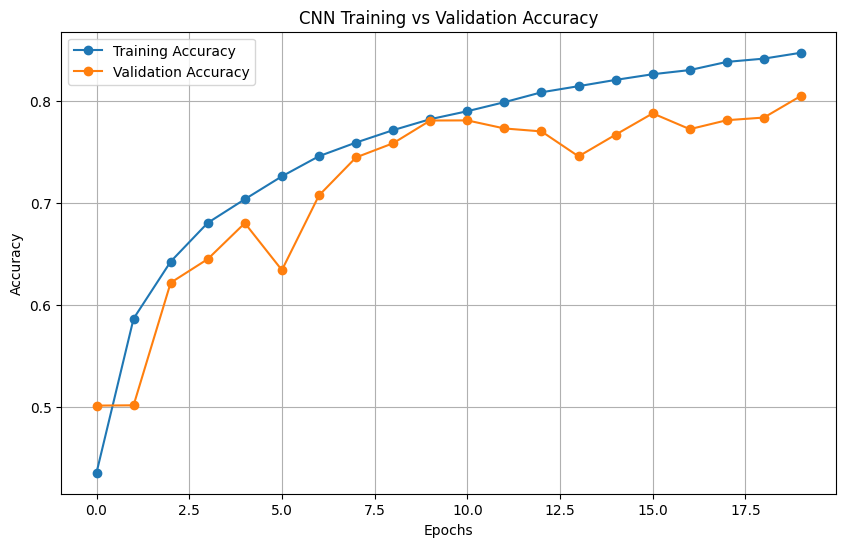

In [8]:
test_loss, test_acc = advanced_model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest Accuracy: {test_acc:.4f}')

# Plot Accuracy Curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], '-o', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], '-o', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN Training vs Validation Accuracy')
plt.grid(True)
plt.show()

**Analysis:**

The training accuracy shows a consistent upward trend, reaching over 80%, which indicates that the model is effectively learning from the data. However, the validation accuracy, while also improving, exhibits some fluctuations and remains lower than the training accuracy. This suggests that the model might be overfitting to the training set, meaning it performs well on known data but struggles with unseen examples.

### **Make Predictions on Test Data**

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step


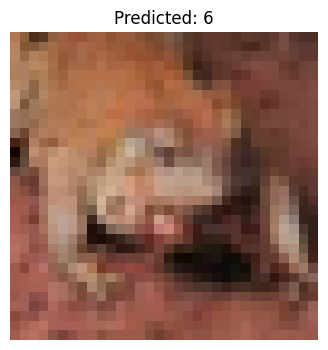

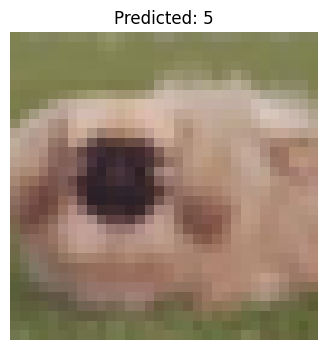

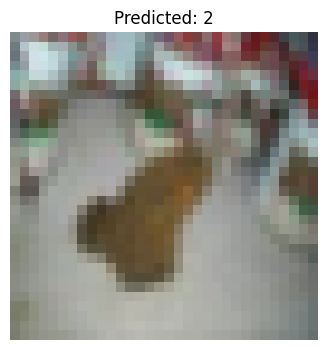

In [13]:
predictions = advanced_model.predict(x_test)
def display_prediction(index):
    plt.figure(figsize=(4, 4))
    plt.imshow(x_test[index])
    plt.title(f'Predicted: {np.argmax(predictions[index])}')
    plt.axis('off')
    plt.show()

display_prediction(5)
display_prediction(31)
display_prediction(59)